# Introduction

This database including 10866 movies id and informations of them. I will clean the database and visualize data through charts.

Questions:
* 1 How is popularity trending over time?

* 2 How are revenues trending over time?

* 3 How is runtime trending over time?

* 4 Do top ratings movies always generate big revenue?

* 5 Do higher budget movies always generate big revenue?

* 6 Is there any impact of vote count on revenue?

In [57]:
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
movie = pd.read_csv('./tmdb-movies.csv')

In [38]:
movie.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [39]:
movie.shape

(10866, 21)

In [40]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

## Now that data is loaded, I will make following changes:

* Remove useless columns
* Remove rows with null values
* Drop duplicates values
* Some datatypes are wrong

Define:
Remove useless columns

In [41]:
#Code
#deleted columns 
deleted_columns = [ 'id', 'budget', 'revenue','original_title', 'homepage', 'keywords', 'tagline', 'overview', 'production_companies']
#drop it from our data
movie.drop(deleted_columns,axis = 1, inplace = True)

In [42]:
#Test
movie.head()

,imdb_id,popularity,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Define: Remove rows with null values

In [43]:
#Code
movie.dropna(axis = 0,inplace = True)

In [45]:
#Test
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10727 entries, 0 to 10865
Data columns (total 12 columns):
imdb_id         10727 non-null object
popularity      10727 non-null float64
cast            10727 non-null object
director        10727 non-null object
runtime         10727 non-null int64
genres          10727 non-null object
release_date    10727 non-null object
vote_count      10727 non-null int64
vote_average    10727 non-null float64
release_year    10727 non-null int64
budget_adj      10727 non-null float64
revenue_adj     10727 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1.1+ MB


Define: Drop duplicates values

In [46]:
#Code
movie.drop_duplicates(inplace = True)

In [47]:
#Test
sum(movie.imdb_id.duplicated())

0

Define
Correct datatype

In [48]:
#Code
movie['release_date'] = pd.to_datetime(movie['release_date'])
movie['budget_adj'] = movie['budget_adj'].astype('int64') 
movie['revenue_adj'] = movie['revenue_adj'].astype('int64') 

In [49]:
#Test
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10726 entries, 0 to 10865
Data columns (total 12 columns):
imdb_id         10726 non-null object
popularity      10726 non-null float64
cast            10726 non-null object
director        10726 non-null object
runtime         10726 non-null int64
genres          10726 non-null object
release_date    10726 non-null datetime64[ns]
vote_count      10726 non-null int64
vote_average    10726 non-null float64
release_year    10726 non-null int64
budget_adj      10726 non-null int64
revenue_adj     10726 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 1.1+ MB


In [50]:
movie.head()

,imdb_id,popularity,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939,1392445892
1,tt1392190,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939,348161292
2,tt2908446,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101199955,271619025
3,tt2488496,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,183999919,1902723129
4,tt2820852,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,174799923,1385748801


Define 
Round up popularity score

In [51]:
#Code
movie['popularity'] = movie.popularity.round().astype(int)

In [52]:
#Test
movie['popularity'].value_counts()

0     6606
1     3204
2      540
3      189
4       72
5       39
6       36
7       11
8       10
9        8
11       3
13       2
28       1
12       1
14       1
10       1
33       1
25       1
Name: popularity, dtype: int64

Questions
* 1 How is popularity trending over time?

* 2 How are revenues trending over time?

* 3 How is runtime trending over time?

* 4 Do top ratings movies always generate big revenue?

* 5 Do higher budget movies always generate big revenue?

* 6 Is there any impact of vote count on revenue?

#1 How is popularity trending over time?

In [92]:
pop_trending = movie.groupby(['release_year']).popularity.mean()
pop_trending

release_year
1960    0.312500
1961    0.322581
1962    0.375000
1963    0.470588
1964    0.309524
1965    0.200000
1966    0.173913
1967    0.421053
1968    0.421053
1969    0.333333
1970    0.125000
1971    0.345455
1972    0.300000
1973    0.400000
1974    0.304348
1975    0.386364
1976    0.382979
1977    0.500000
1978    0.276923
1979    0.473684
1980    0.371795
1981    0.329268
1982    0.419753
1983    0.437500
1984    0.528846
1985    0.527778
1986    0.416667
1987    0.362903
1988    0.330986
1989    0.429630
1990    0.416667
1991    0.368421
1992    0.492424
1993    0.485876
1994    0.559783
1995    0.643678
1996    0.502463
1997    0.638743
1998    0.519048
1999    0.558036
2000    0.459821
2001    0.614108
2002    0.621212
2003    0.619217
2004    0.644951
2005    0.534626
2006    0.537129
2007    0.500000
2008    0.504115
2009    0.499044
2010    0.593684
2011    0.580827
2012    0.519164
2013    0.533951
2014    0.825513
2015    0.941653
Name: popularity, dtype: float64

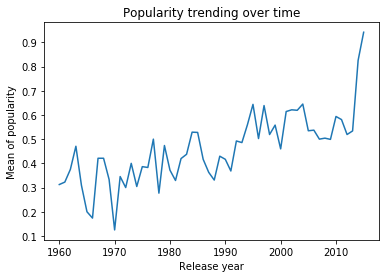

In [93]:
w = 10
n = math.ceil((pop_trending.index.max() - \
               pop_trending.index.min())/w)
lines = pop_trending.plot.line()
plt.title('Popularity trending over time')
plt.xlabel('Release year')
plt.ylabel('Mean of popularity');

Trending of popularity showed a fluctuating upward trend from 1960 to 2015.

In [15]:
#2 How are revenues trending over time?

In [87]:
rev_trending = movie.groupby(['release_year']).revenue_adj.mean()
rev_trending

release_year
1960    3.340991e+07
1961    7.947167e+07
1962    4.856238e+07
1963    3.924580e+07
1964    5.707603e+07
1965    9.057670e+07
1966    1.237527e+07
1967    1.269224e+08
1968    4.367372e+07
1969    4.833818e+07
1970    7.866032e+07
1971    3.964586e+07
1972    6.449502e+07
1973    1.092939e+08
1974    7.811482e+07
1975    8.817223e+07
1976    6.530237e+07
1977    1.400939e+08
1978    7.044251e+07
1979    8.880802e+07
1980    5.999930e+07
1981    5.190054e+07
1982    6.858276e+07
1983    6.314877e+07
1984    5.319304e+07
1985    5.397841e+07
1986    4.978122e+07
1987    5.358111e+07
1988    4.855097e+07
1989    6.729647e+07
1990    6.720056e+07
1991    5.665942e+07
1992    7.155756e+07
1993    5.931408e+07
1994    5.672917e+07
1995    7.530127e+07
1996    5.692008e+07
1997    7.578340e+07
1998    6.047132e+07
1999    6.636262e+07
2000    6.206358e+07
2001    6.852431e+07
2002    6.724196e+07
2003    6.385821e+07
2004    6.315163e+07
2005    5.108613e+07
2006    4.357665e+07


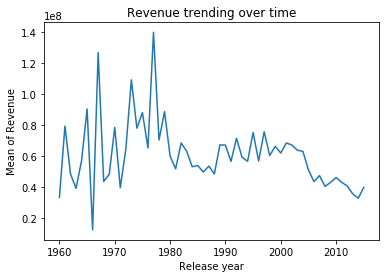

In [90]:
w = 10
n = math.ceil((rev_trending.index.max() - \
               rev_trending.index.min())/w)
lines = rev_trending.plot.line()
plt.title('Revenue trending over time')
plt.xlabel('Release year')
plt.ylabel('Mean of Revenue');

Trending of revenue showed a fluctuating downward trend from 1960 to 2015.

In [94]:
#3 How is runtime trending over time?

In [95]:
run_trending = movie.groupby(['release_year']).runtime.mean()
run_trending

release_year
1960    110.656250
1961    119.419355
1962    124.343750
1963    111.323529
1964    109.214286
1965    118.171429
1966    106.891304
1967    108.921053
1968    109.947368
1969    110.066667
1970    113.075000
1971    107.727273
1972    101.950000
1973    103.527273
1974    107.804348
1975    107.363636
1976    109.319149
1977    108.160714
1978    110.076923
1979    112.017544
1980    107.500000
1981    105.865854
1982    103.925926
1983    103.000000
1984    104.442308
1985    110.203704
1986    100.750000
1987    101.951613
1988    102.845070
1989    105.525926
1990    105.651515
1991    105.112782
1992    107.113636
1993    107.587571
1994    106.913043
1995    107.574713
1996    106.167488
1997    106.675393
1998    105.061905
1999    108.861607
2000    104.620536
2001    108.024896
2002    106.969697
2003    100.679715
2004    105.364821
2005    103.481994
2006    102.574257
2007    100.697674
2008    100.596708
2009     98.583174
2010     99.298947
2011     98.507519

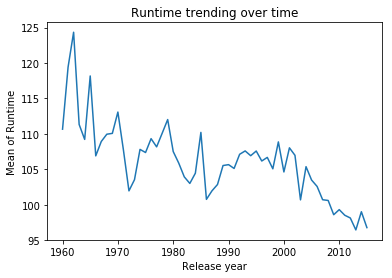

In [96]:
w = 10
n = math.ceil((run_trending.index.max() - \
               run_trending.index.min())/w)
lines = run_trending.plot.line()
plt.title('Runtime trending over time')
plt.xlabel('Release year')
plt.ylabel('Mean of Runtime');

Trending of runtime showed a fluctuating downward trend from 1960 to 2015.

In [19]:
#4 Do top ratings movies always generate big revenue?

In [110]:
top_rating = movie.vote_count.max()
top_rating_id = movie[movie['vote_count'] == top_rating].imdb_id

In [109]:
top_revenue = movie.revenue_adj.max()
top_rev_id = movie[movie['revenue_adj'] == top_revenue].imdb_id

In [113]:
print(top_rating_id, top_rev_id)

1919    tt1375666
Name: imdb_id, dtype: object 1386    tt0499549
Name: imdb_id, dtype: object


No, it's not. Top rating movie id and top revenue movie id  are different.

In [106]:
#5 Do higher budget movies always generate big revenue?

In [114]:
top_budget = movie.budget_adj.max()
top_budget_id = movie[movie['budget_adj'] == top_budget].imdb_id

In [119]:
print(top_budget_id, top_rev_id)

2244    tt1032751
Name: imdb_id, dtype: object 1386    tt0499549
Name: imdb_id, dtype: object


No, it's not. Top budget movie id and top revenue movie id are different.

In [23]:
#6  Is there any impact of vote count on revenue?

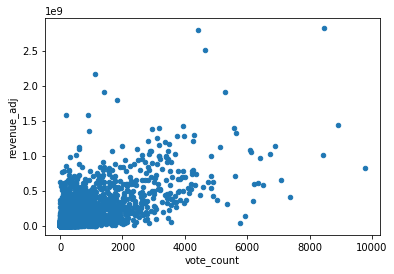

In [120]:
movie.plot.scatter(x="vote_count", y="revenue_adj");

There is no strong impact of vote count on revenue.

# Conclusions

After I cleaned the data there are 10727 rows with non null values and 12 columns. Here are some results that I find.
(1) Trending of popularity showed a fluctuating upward trend from 1960 to 2015.

(2) Trending of revenue showed a fluctuating downward trend from 1960 to 2015.

(3) Trending of runtime showed a fluctuating downward trend from 1960 to 2015.

(4) Top rating movie id and top revenue movie id are different.

(5) Top budget movie id and top revenue movie id are different.

(6) There is no strong impact of vote count on revenue.

# Limitations

The limitations of this case study are:
(1) Small sample size
(2) Since Kaggle have removed the original version of this dataset, results may not be accurate.